# 第一次作业

## 伪随机数算法

### 什么是随机数

$\qquad$随机数在计算机应用中使用的比较广泛，最为熟知的便是在密码学中的应用。随机数有3个特性：<br />
$\qquad$（1）随机性：不存在统计学偏差，是完全杂乱的数列<br />
$\qquad$（2）不可预测性：不能从过去的数列推测出下一个出现的数<br />
$\qquad$（3）不可重现性：除非将数列本身保存下来，否则不能重现相同的数列<br />

### 真随机和伪随机

$\qquad$真随机数数列是完全不可预测的，可以通过放射性衰变、电子设备的热噪音、宇宙射线的触发时间等物理过程得到，但无法通过单纯的软件方式获得；<br />
$\qquad$伪随机数数列是可预测的，严格意义上不具有随机性质，通常用数学公式的方法获得。<br />
$\qquad$只要这个随机数是由确定算法生成的，那就是伪随机。只能通过不断算法优化，使你的随机数更接近随机。<br />

### 生成算法

$\qquad$1.线性同余算法 <br />
$\qquad$2.平方取中算法 <br />
$\qquad$3.梅森旋转算法 <br />
$\qquad$4.其他算法<br />

### 线性同余算法

该算法由递归式$\quad$$X_{n++} = (aX_n + c) ~~ mod ~~ m ~~$得到随机数<br />
$\qquad \centerdot m$,$~~m>0$,模数,显然其也是生成随机序列的最大周期<br />
$\qquad \centerdot a$,$~~0<a<m$,乘数<br />
$\qquad \centerdot c$,$~~0 \leq c < m$,增量<br />
$\qquad \centerdot X_0$,$~~0 \leq X_0 < m$,种子点(起始点)<br />

高性能线性同余算法参数取值:<br />
$\qquad$(1)乘数$~~a~~$满足$a = 4p+1$;增量$~~b~~$满足$b = 2q+1$。其中$p$,$q$都是正整数。<br />
$\qquad$(2)$~~m~~$值最好选的大一些，$m$值直接影响伪随机数序列的周期长短。<br />
$\qquad$(3)$~~a~~$和$~~b~~$值越大，产生的伪随机数越均匀。<br />
$\qquad$(4)$~~a~~$和$~~m~~$互质，产生的随机数效果较不互质好。<br />



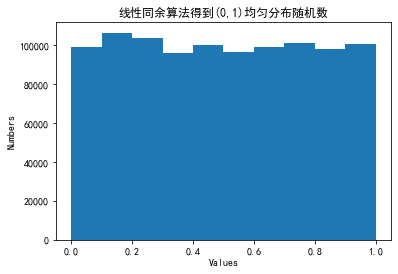

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

class LinearCongruential:
    def __init__(self, _seed):
        self._a = 22695477
        self._c = 1
        self._m = 2 ** 32
        self._seed = _seed

    #  生成[0,1）范围的随机数
    def random(self):
        self._seed = (self._a * self._seed + self._c) % self._m
        return self._seed / float(self._m)

    #  生成numbers个[0,1）范围的随机数组
    def random_numbers(self, numbers):
        _samples = []
        for i in range(numbers):
            _samples.append(self.random())
        return _samples
lcg = LinearCongruential(time.time())
size = 1000000
sample = lcg.random_numbers(size)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Values')  # 绘制x轴
plt.ylabel('Numbers')  # 绘制y轴

# 画随机数分布
plt.hist(sample, bins=10)
plt.title('线性同余算法得到(0,1)均匀分布随机数')
plt.show()

### Box-Muller变换

$\qquad$Box-Muller变换是通过服从均匀分布的随机变量，来构建服从高斯分布的随机变量的一种方法。具体的描述为：选取两个服从$[0,1]$上均匀分布的随机变量$U_1$、$U_2$，若$X$、$Y$满足:
$$X = \cos(2\pi U_1)\sqrt{-2ln(U_2)} \\
Y = \sin(2\pi U_2)\sqrt{-2ln(U_1)}
$$
则$X$ 和 $Y$ 服从均值为$0$，方差为$1$的高斯分布


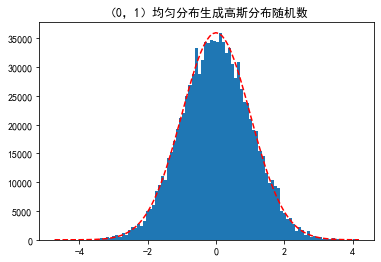

In [11]:
#  高斯分布概率密度函数
sample_gauss = []
def gauss(x, mu=0, sigma=1):
    return (1 / np.sqrt(2 * np.pi) * sigma) * np.exp(-(np.power((x - mu), 2)) / (2 * np.power(sigma, 2)))
# 画高斯分布
for i in range(0, len(sample), 2):
    sample_gauss.append(np.sqrt(-2 * np.log(sample[i])) * np.cos(2 * np.pi * sample[i + 1]))
    sample_gauss.append(np.sqrt(-2 * np.log(sample[i])) * np.sin(2 * np.pi * sample[i + 1]))
n, bins, patches = plt.hist(sample_gauss, 100)
plt.plot(bins, gauss(bins) * max(n) * np.sqrt(2 * np.pi), 'r--')
plt.title(u'（0，1）均匀分布生成高斯分布随机数')
plt.show()    
